# Make Your Dream Team

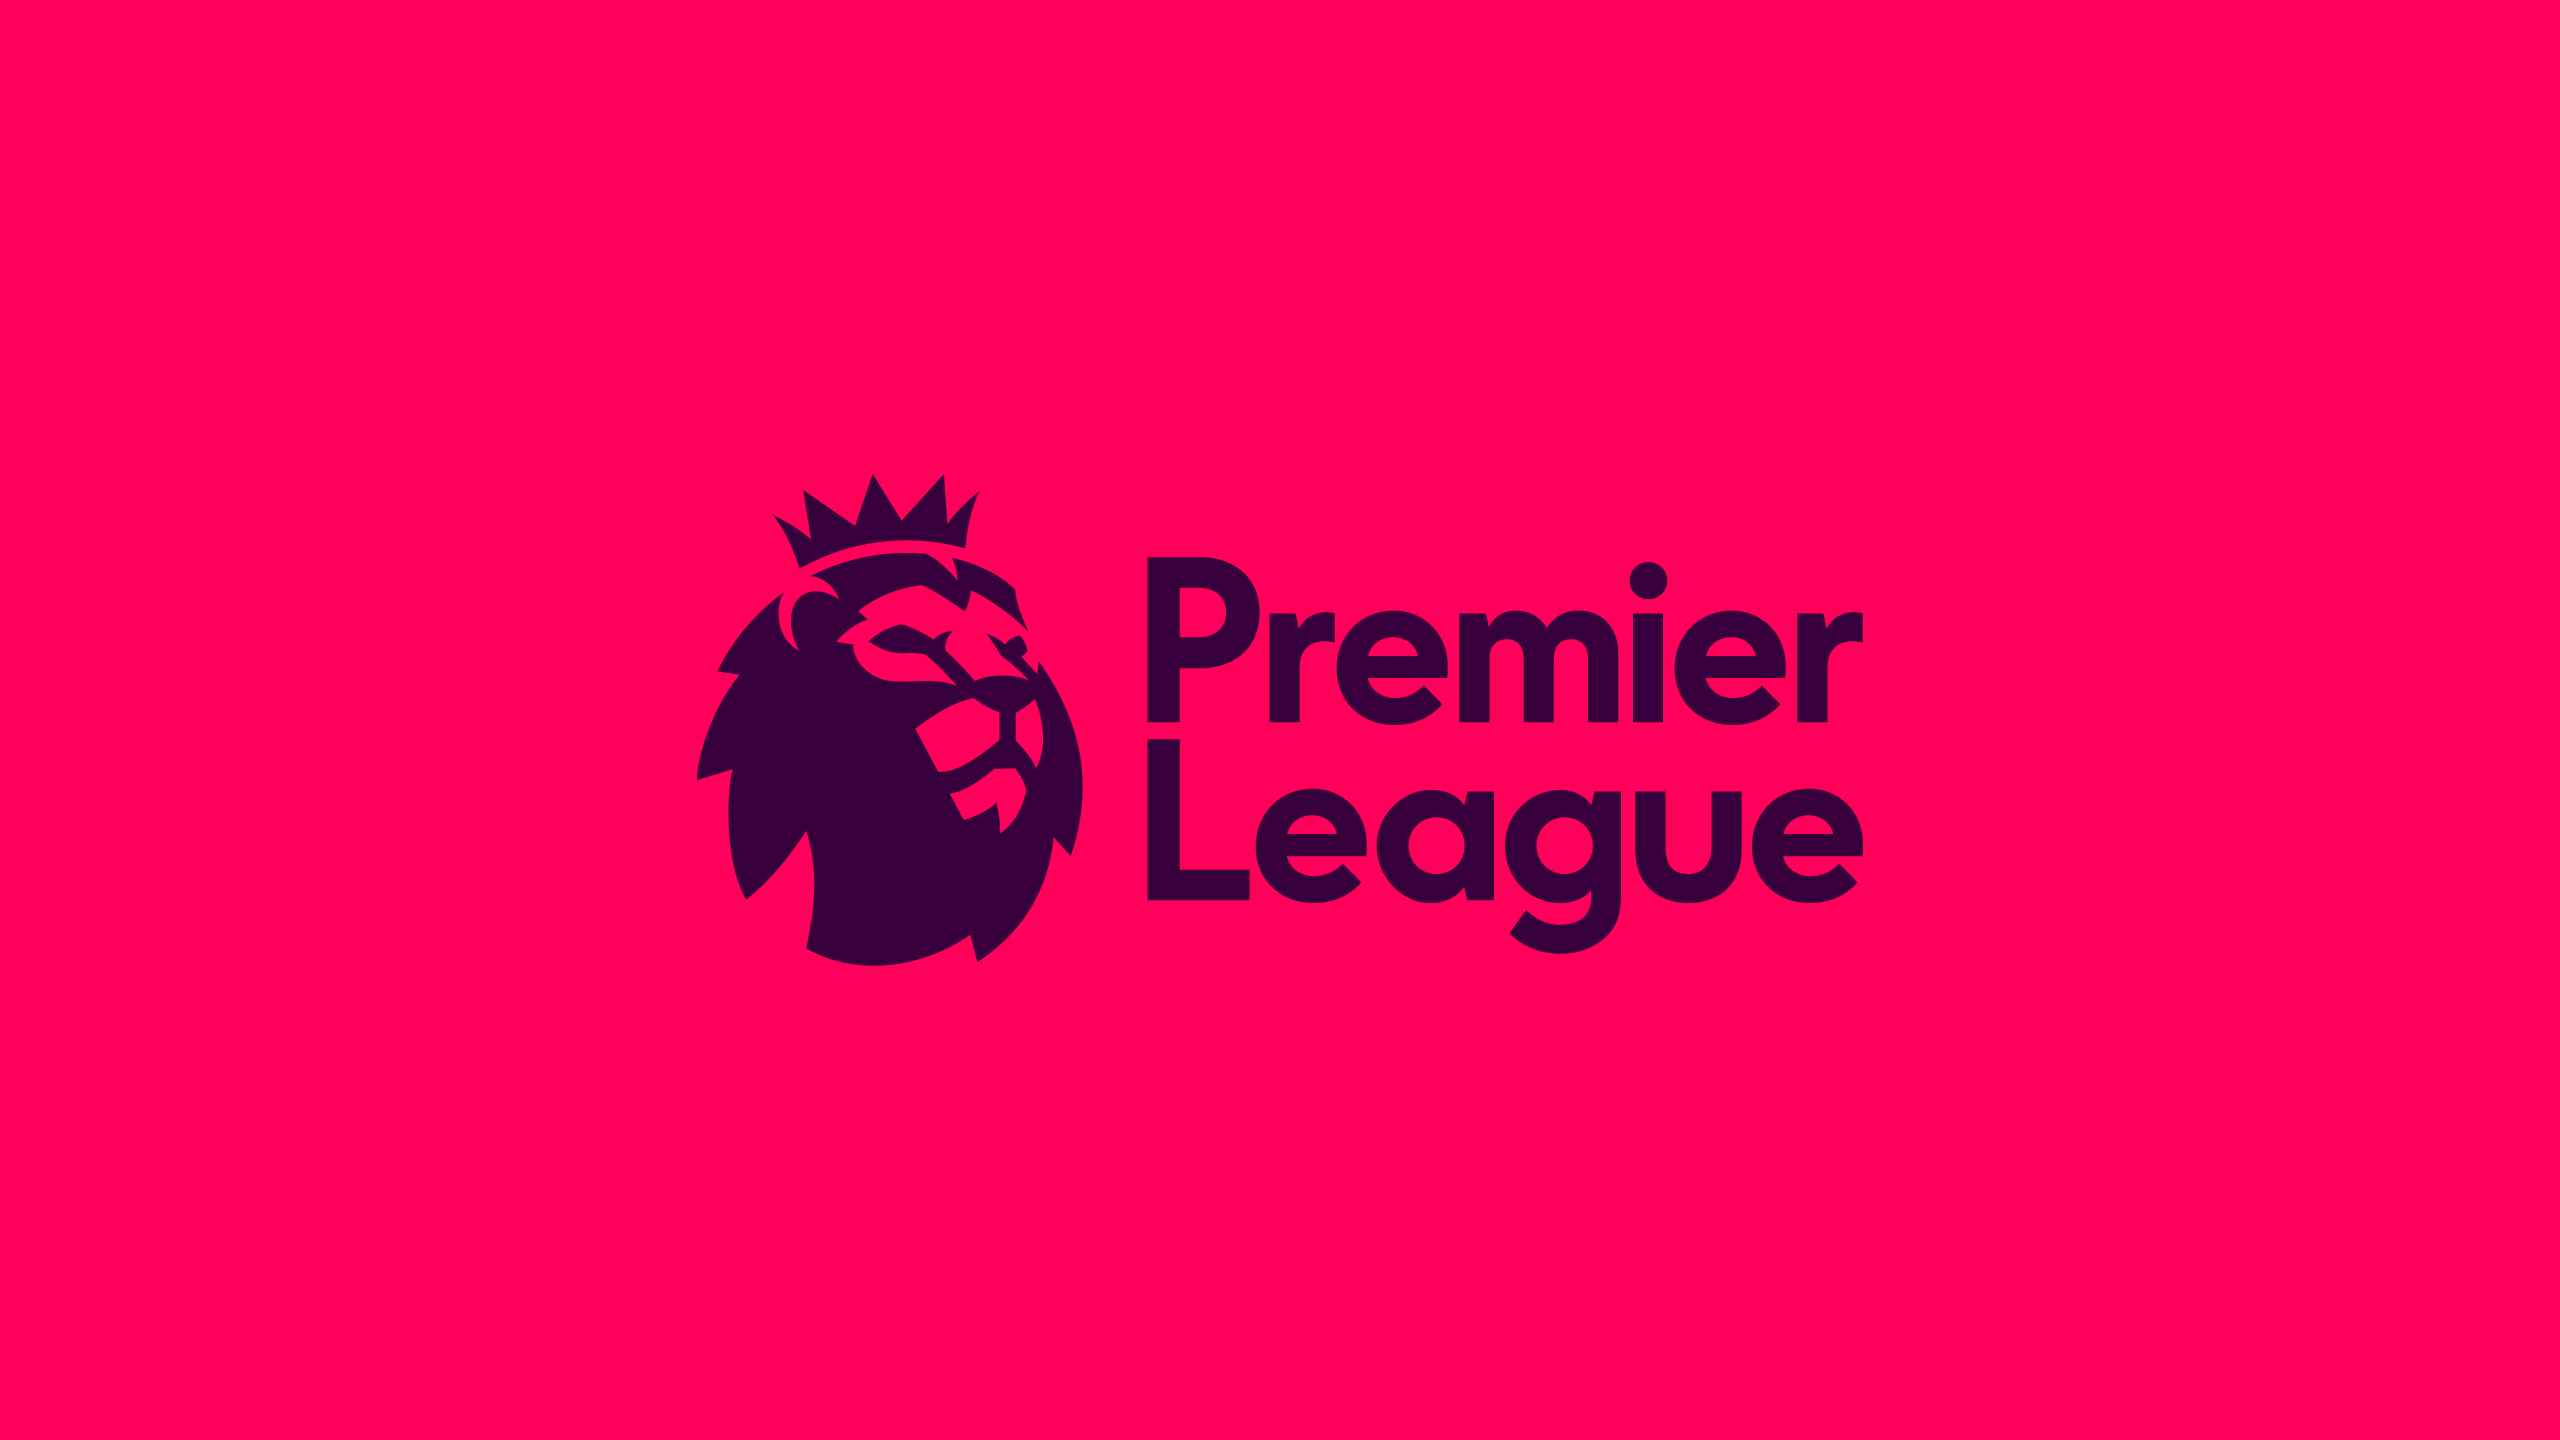

Hi, Kagglers and Football lovers.
 
I'm really big fan of EPL.

I've watched match games on weekends.

Today, I'm going to see a Premier league players stats.

 We will create 5-A-Side Team 

- 1 Goalkeeper

- 1 Defender

- 2 Midefielder

- 1 Forward

or If you wanna a team which more aggresive.

- 1 Goalkeeper

- 1 Defender

- 1 Midfielder

- 2 Forward

I hope you enjoy it.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


sns.set_style('darkgrid')

In [17]:
df = pd.read_csv('premier_league.csv')
print(df.shape)
df.head()

(571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


# Goalkeeper

In [18]:
goalkeeper = df[(df['Position'] == 'Goalkeeper') & (df['Appearances'] > 15)].reset_index()

# make new variables
goalkeeper['Clean sheets per game'] = goalkeeper['Clean sheets'] / goalkeeper['Appearances']
goalkeeper['Saves per game'] = goalkeeper['Saves'] / goalkeeper['Appearances']
goalkeeper['Catches per game'] = goalkeeper['Catches'] / goalkeeper['Appearances']
goalkeeper['Punches per game'] = goalkeeper['Punches'] / goalkeeper['Appearances']
goalkeeper['High claims per game'] = goalkeeper['High Claims'] / goalkeeper['Appearances']
goalkeeper['Goals conceded per game'] = goalkeeper['Goals conceded'] / goalkeeper['Appearances']
goalkeeper['Sweeper clearances per game'] = goalkeeper['Sweeper clearances'] / goalkeeper['Appearances']
goalkeeper['Errors per game'] = goalkeeper['Errors leading to goal'] / goalkeeper['Appearances']

goalkeeper = goalkeeper[['Name', 'Appearances', 'Clean sheets per game', 'Saves per game', 'Catches per game', 'Punches per game', 'High claims per game',
                        'Goals conceded per game', 'Sweeper clearances per game', 'Errors per game']]

In [19]:
goalkeeper_top10 = goalkeeper.sort_values('Clean sheets per game', ascending = False)[:10]
goalkeeper_top10

,Name,Appearances,Clean sheets per game,Saves per game,Catches per game,Punches per game,High claims per game,Goals conceded per game,Sweeper clearances per game,Errors per game
14,Alisson,69,0.507246,1.985507,0.173913,0.376812,0.289855,0.695652,0.521739,0.057971
16,Ederson,110,0.472727,1.672727,0.118182,0.254545,0.409091,0.709091,0.690909,0.045455
13,Loris Karius,29,0.448276,1.758621,0.241379,0.517241,0.482759,0.896552,0.586207,0.068966
2,Emiliano Martínez,16,0.437500,2.750000,0.375000,0.125000,1.375000,1.000000,0.250000,0.000000
29,Joe Hart,340,0.373529,2.767647,0.732353,0.791176,1.150000,1.126471,0.529412,0.058824
20,Dean Henderson,36,0.361111,2.694444,0.194444,0.444444,0.444444,0.916667,0.222222,0.027778
18,David de Gea,314,0.359873,2.770701,0.340764,0.343949,0.589172,1.009554,0.277070,0.041401
4,Nick Pope,74,0.351351,3.202703,0.243243,0.391892,1.351351,1.202703,0.608108,0.027027
27,Hugo Lloris,262,0.351145,2.683206,0.366412,0.675573,0.801527,1.057252,0.980916,0.068702
26,Fraser Forster,107,0.345794,2.420561,0.242991,0.289720,0.757009,1.112150,0.196262,0.065421


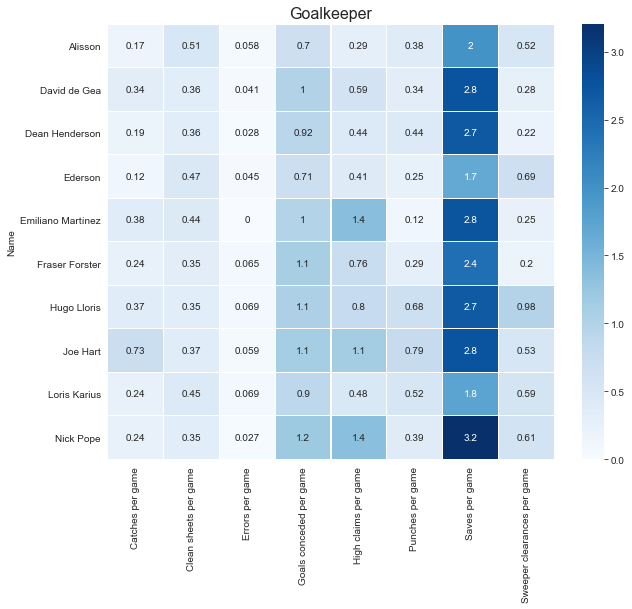

In [20]:
plt.figure(figsize = (10,8))
g1 = pd.pivot_table(index = 'Name',  data = goalkeeper_top10,values = ['Appearances', 'Clean sheets per game', 'Saves per game', 'Catches per game', 'Punches per game', 
                                                             'High claims per game', 'Goals conceded per game', 'Sweeper clearances per game', 'Errors per game'], aggfunc = 'mean')

sns.heatmap(g1.iloc[:,1:], cmap = 'Blues', annot = True, linewidths=.2)

plt.title("Goalkeeper", size = 16)
plt.show()

Alisson has the highest clean sheet rate. This is thanks to his ability and Liverpool's strong defensive organization.

The goalkeepers of the strong team have a lower save rate than the goalkeepers of the weak team. This is because in the case of a strong team, the ratio that allows shooting is low.

# Defender

In [21]:
# make new variables
df['Tackles per game'] = df['Tackles'] / df['Appearances']
df['Blocked shots per game'] = df['Blocked shots'] / df['Appearances']
df['Interceptions per game'] = df['Interceptions'] / df['Appearances']
df['Headed clearances per game'] = df['Headed Clearance'] / df['Appearances']
df['Recoveries per game'] = df['Recoveries'] / df['Appearances']
df['Duels %'] = df['Duels won'] / (df['Duels won'] +  df['Duels lost'])
df['Aerial battle %'] = df['Aerial battles won'] / (df['Aerial battles won'] +  df['Aerial battles lost'])
df['Errors per game'] = df['Errors leading to goal'] / df['Appearances']

defender = df[(df['Position'] == 'Defender') & (df['Appearances'] > 15)].reset_index()

defender = defender[['Name', 'Appearances', 'Tackles per game', 'Blocked shots per game', 'Interceptions per game', 'Headed clearances per game', 'Recoveries per game',
         'Duels %', 'Aerial battle %', 'Errors per game', 'Passes per match']]
centerback_top10 = defender.sort_values('Duels %', ascending = False)[:10]
centerback_top10

,Name,Appearances,Tackles per game,Blocked shots per game,Interceptions per game,Headed clearances per game,Recoveries per game,Duels %,Aerial battle %,Errors per game,Passes per match
59,Virgil van Dijk,159,1.157233,0.169811,1.748428,3.320755,5.264151,0.731757,0.742584,0.018868,66.38
62,Joel Matip,86,1.558140,0.116279,1.453488,2.383721,4.872093,0.680445,0.712538,0.023256,61.03
66,John Stones,163,1.104294,0.042945,1.171779,2.073620,4.398773,0.677551,0.657371,0.042945,54.91
30,Kurt Zouma,143,1.118881,0.090909,1.573427,2.461538,4.013986,0.674926,0.717014,0.013986,40.33
75,Harry Maguire,140,1.364286,0.164286,1.664286,2.828571,6.221429,0.673946,0.709770,0.007143,52.32
121,Willy Boly,60,2.450000,0.100000,1.933333,2.933333,5.600000,0.665102,0.711246,0.000000,46.32
97,Phil Jagielka,366,1.920765,0.106557,1.688525,2.937158,4.442623,0.664982,0.612676,0.016393,40.37
22,James Tarkowski,123,1.642276,0.105691,1.349593,3.349593,3.837398,0.660783,0.698577,0.008130,31.21
18,Bernardo,36,2.472222,0.138889,1.111111,1.361111,4.694444,0.660436,0.663717,0.000000,30.97
111,Kyle Bartley,23,1.391304,0.086957,1.130435,2.739130,2.565217,0.655172,0.676471,0.043478,33.74


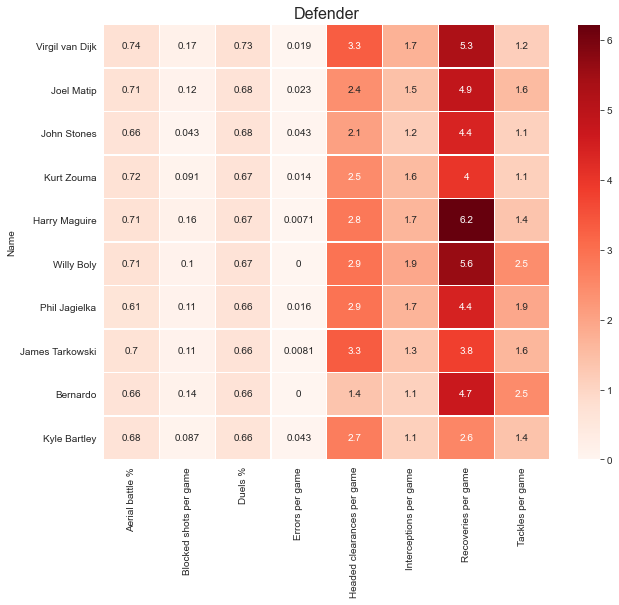

In [22]:
plt.figure(figsize = (10,8))
c1 = pd.pivot_table(index = 'Name',  data = centerback_top10,values = [ 'Tackles per game', 'Blocked shots per game', 'Interceptions per game', 'Headed clearances per game', 
                                                             'Recoveries per game', 'Duels %', 'Aerial battle %', 'Errors per game'], aggfunc = 'mean').sort_values('Duels %', ascending = False)

sns.heatmap(c1, cmap = 'Reds', annot = True, linewidths=.2)

plt.title("Defender", size = 16)
plt.show()

Van diijk, who showed sensational performance, is the player with the highest Aerial Battle% and Duel %.

Also, due to its high height and good positioning, it performs well in Headed claearances per game.

# Midfielder

In [23]:
midfielder =  df[(df['Position'] == 'Midfielder') & (df['Appearances'] > 15)]

playmaker = df[(df['Position'] == 'Midfielder') & (df['Appearances'] > 15)].sort_values('Big chances created', ascending = False).reset_index()
playmaker

,index,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,...,Fouls,Offsides,Tackles per game,Blocked shots per game,Interceptions per game,Headed clearances per game,Recoveries per game,Duels %,Aerial battle %,Errors per game
0,335,Kevin De Bruyne,17.0,Manchester-City,Midfielder,Belgium,29.0,156,109,22,...,122,16.0,1.371795,0.621795,0.564103,0.192308,4.858974,0.451820,0.383234,0.006410
1,365,Juan Mata,8.0,Manchester-United,Midfielder,Spain,32.0,262,136,61,...,134,102.0,0.748092,0.377863,0.503817,0.019084,4.137405,0.409031,0.244444,0.003817
2,185,Gylfi Sigurdsson,10.0,Everton,Midfielder,Iceland,31.0,284,114,110,...,193,16.0,1.225352,0.714789,0.996479,0.154930,3.573944,0.413710,0.263473,0.003521
3,13,Mesut Özil,10.0,Arsenal,Midfielder,Germany,31.0,184,100,39,...,95,83.0,0.875000,0.315217,0.407609,0.070652,4.228261,0.456538,0.252252,0.010870
4,271,Marc Albrighton,11.0,Leicester-City,Midfielder,England,30.0,258,91,94,...,167,17.0,1.647287,0.290698,1.011628,0.174419,4.775194,0.461170,0.272727,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,79,Steven Alzate,17.0,Brighton-and-Hove-Albion,Midfielder,Colombia,22.0,21,6,9,...,21,3.0,1.619048,0.333333,0.714286,0.523810,NaN,NaN,NaN,NaN
131,50,Trézéguet,17.0,Aston-Villa,Midfielder,Egypt,25.0,35,9,19,...,39,6.0,1.142857,0.628571,0.771429,0.257143,2.285714,0.433657,0.400000,0.000000
132,48,Marvelous Nakamba,19.0,Aston-Villa,Midfielder,Zimbabwe,26.0,29,7,16,...,26,0.0,1.896552,0.000000,1.344828,0.241379,5.344828,0.511111,0.442308,0.034483
133,223,Harrison Reed,21.0,Fulham,Midfielder,England,25.0,19,9,5,...,8,0.0,1.894737,0.052632,1.368421,0.157895,2.368421,0.483871,0.250000,0.000000


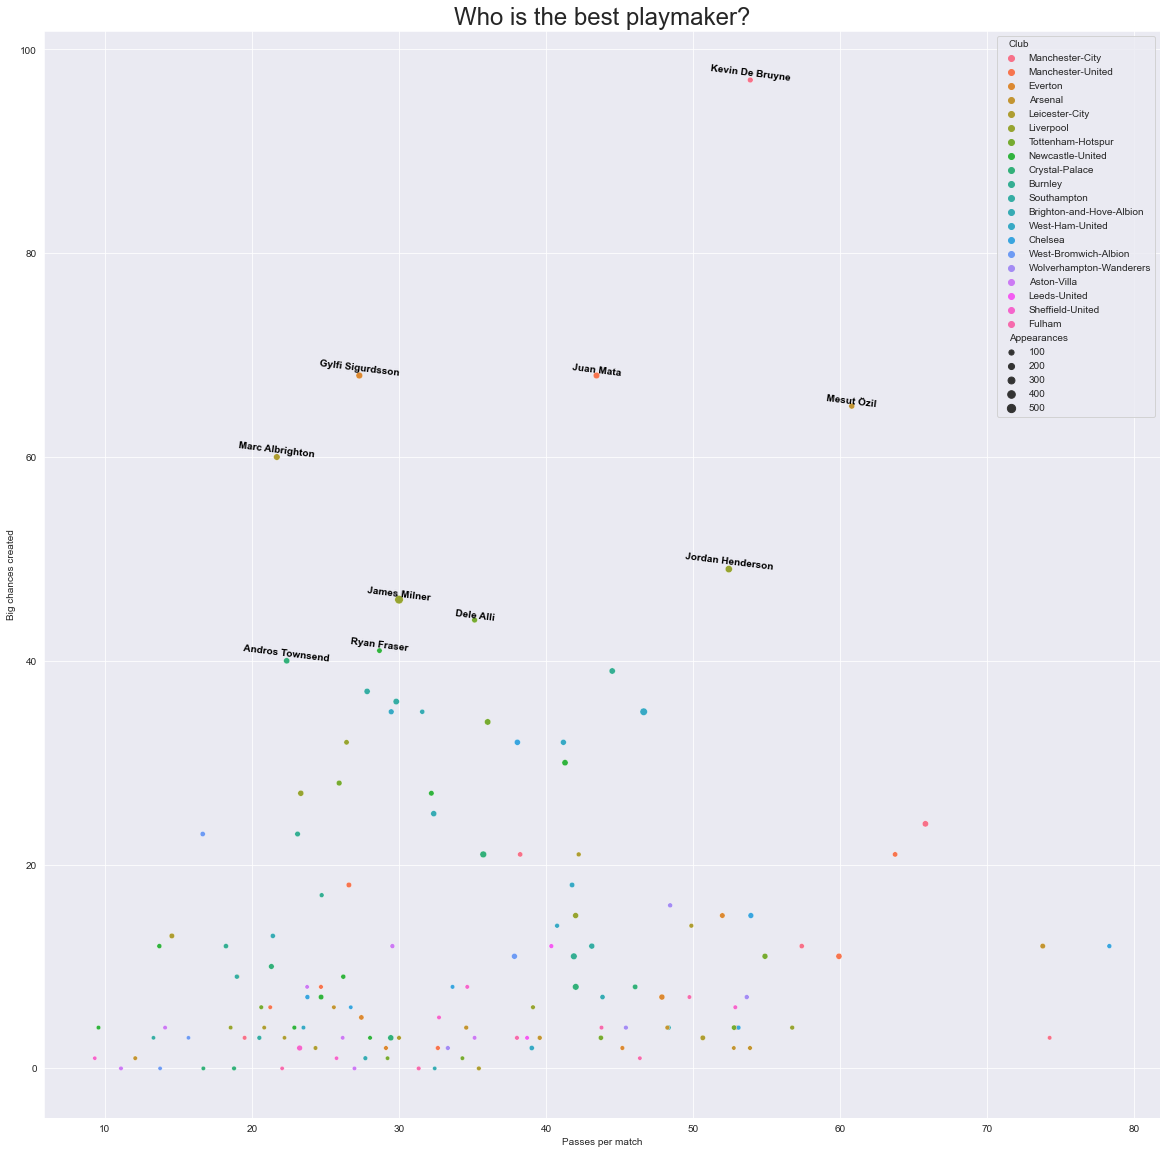

In [24]:
plt.figure(figsize = (20,20))

p1 = sns.scatterplot(data=playmaker, x = 'Passes per match' , y = 'Big chances created', hue = 'Club', size = 'Appearances')
for line in range(0,10):
        p1.text(playmaker['Passes per match'][line], playmaker['Big chances created'][line], playmaker['Name'][line], horizontalalignment='center' , color='black', weight='semibold', rotation = -7)

plt.title('Who is the best playmaker?', size = 24)
plt.show()

Kevin De Bruyne who plays in Man city is the best playmaker.

Kevin dominates other players.

Ozil, Mata, Sigurdsson is the good option too.

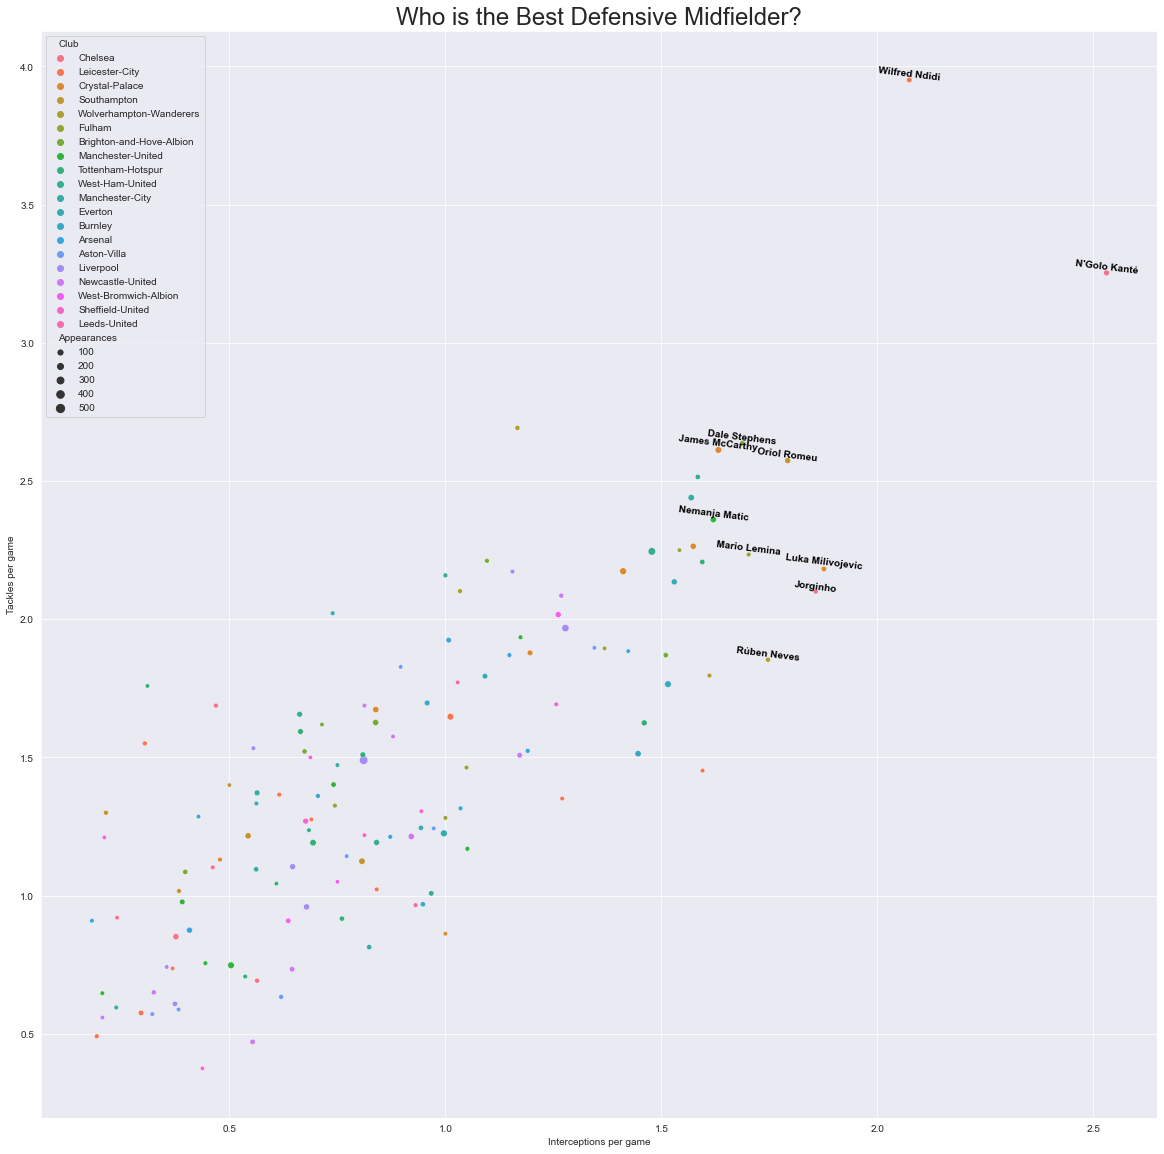

In [33]:
plt.figure(figsize = (20, 20))

defensive_mid = midfielder.sort_values(['Interceptions per game', 'Tackles per game'], ascending = False).reset_index()

m1 = sns.scatterplot(data=defensive_mid, x = 'Interceptions per game' , y = 'Tackles per game', hue = 'Club', size = 'Appearances')
for line in range(0,10):
        m1.text(defensive_mid['Interceptions per game'][line], 
                defensive_mid['Tackles per game'][line], 
                defensive_mid['Name'][line], 
                horizontalalignment='center' , 
                color='black', weight='semibold', rotation = -7)

plt.title('Who is the Best Defensive Midfielder?', size = 24)
plt.show()

Kante, the cutest midfielder in the world, shows that best performance in interceptions per game.

Ndidi has fantastic tackle skills.

# Forward

In [26]:
Forward = df[(df['Position'] == 'Forward') & (df['Appearances'] > 15)]

scorer = Forward.sort_values('Goals', ascending = False).reset_index().drop('index', axis = 1)

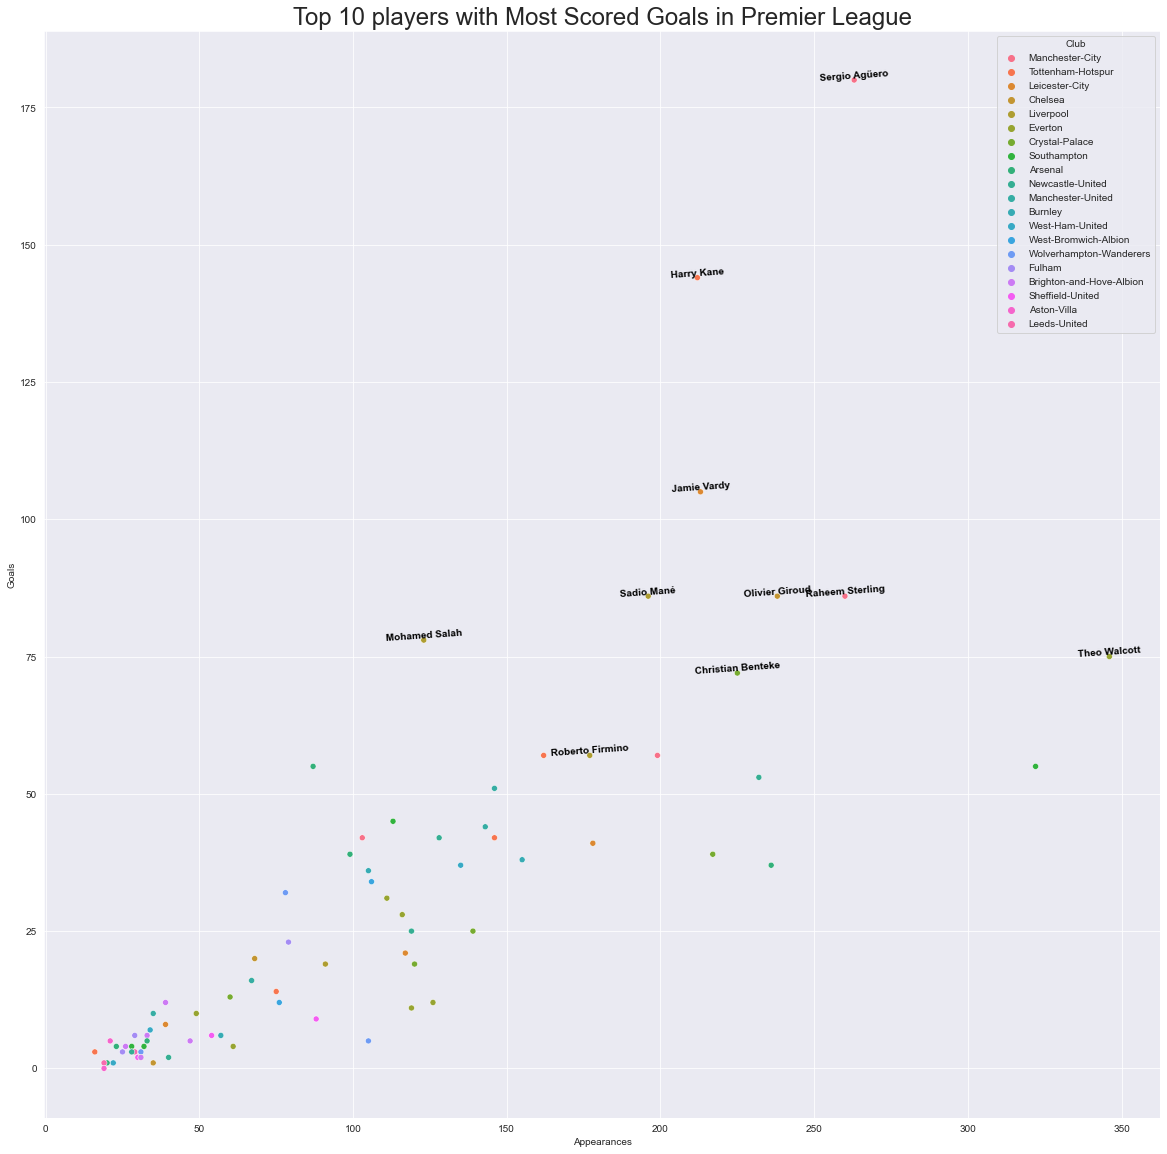

In [34]:
plt.figure(figsize = (20,20))

p1 = sns.scatterplot(data=scorer, x = 'Appearances' , y = 'Goals', hue = 'Club')

for line in range(0,10):
        p1.text(scorer['Appearances'][line], scorer['Goals'][line], scorer['Name'][line], horizontalalignment='center' , color='black', weight='semibold', rotation = 4)

plt.title('Top 10 players with Most Scored Goals in Premier League', size = 24)
plt.show()

Sergio Aguero scored the most in the Premier League.

And There are Harry Kane and Jamie Vardy.

All three strikers are different types of players.

Aguero has fantastic dribbling, skills.

Harry Kane has great shooting skills and good physical abilities.

Jamie Vardy is  very fast, he has sharp finishing too.

In [28]:
Forward['Goal per shot'] = Forward['Goals']/ Forward['Shots']
scorer_per_shoot = Forward[Forward['Goals'] > 10].sort_values('Goal per shot', ascending = False).reset_index().drop('index', axis = 1)
scorer_per_shoot

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Offsides,Tackles per game,Blocked shots per game,Interceptions per game,Headed clearances per game,Recoveries per game,Duels %,Aerial battle %,Errors per game,Goal per shot
0,Pierre-Emerick Aubameyang,14.0,Arsenal,Forward,Gabon,31.0,87,43,25,55,...,55.0,0.666667,0.597701,0.287356,0.137931,NaN,NaN,NaN,NaN,0.247748
1,Jamie Vardy,9.0,Leicester-City,Forward,England,33.0,213,86,77,105,...,195.0,0.582160,0.384977,0.276995,0.291080,NaN,NaN,NaN,NaN,0.229258
2,Divock Origi,27.0,Liverpool,Forward,Belgium,25.0,91,57,14,19,...,26.0,0.373626,0.241758,0.076923,0.032967,NaN,NaN,NaN,NaN,0.213483
3,Chris Wood,9.0,Burnley,Forward,New Zealand,28.0,105,35,43,36,...,117.0,0.266667,0.209524,0.066667,0.419048,NaN,NaN,NaN,NaN,0.209302
4,Sadio Mané,10.0,Liverpool,Forward,Senegal,28.0,196,121,35,86,...,117.0,1.153061,0.469388,0.494898,0.132653,NaN,NaN,NaN,NaN,0.193258
5,Alexandre Lacazette,9.0,Arsenal,Forward,France,29.0,99,46,28,39,...,62.0,0.929293,0.444444,0.303030,0.353535,NaN,NaN,NaN,NaN,0.191176
6,Anthony Martial,9.0,Manchester-United,Forward,France,24.0,146,73,37,51,...,49.0,0.527397,0.493151,0.198630,0.205479,NaN,NaN,NaN,NaN,0.190299
7,Callum Wilson,13.0,Newcastle-United,Forward,England,28.0,128,39,60,42,...,94.0,0.320312,0.367188,0.148438,0.242188,NaN,NaN,NaN,NaN,0.185841
8,Gabriel Jesus,9.0,Manchester-City,Forward,Brazil,23.0,103,80,12,42,...,59.0,0.543689,0.368932,0.242718,0.126214,NaN,NaN,NaN,NaN,0.185022
9,Harry Kane,10.0,Tottenham-Hotspur,Forward,England,27.0,212,120,48,144,...,160.0,0.655660,0.896226,0.278302,0.523585,NaN,NaN,NaN,NaN,0.183908


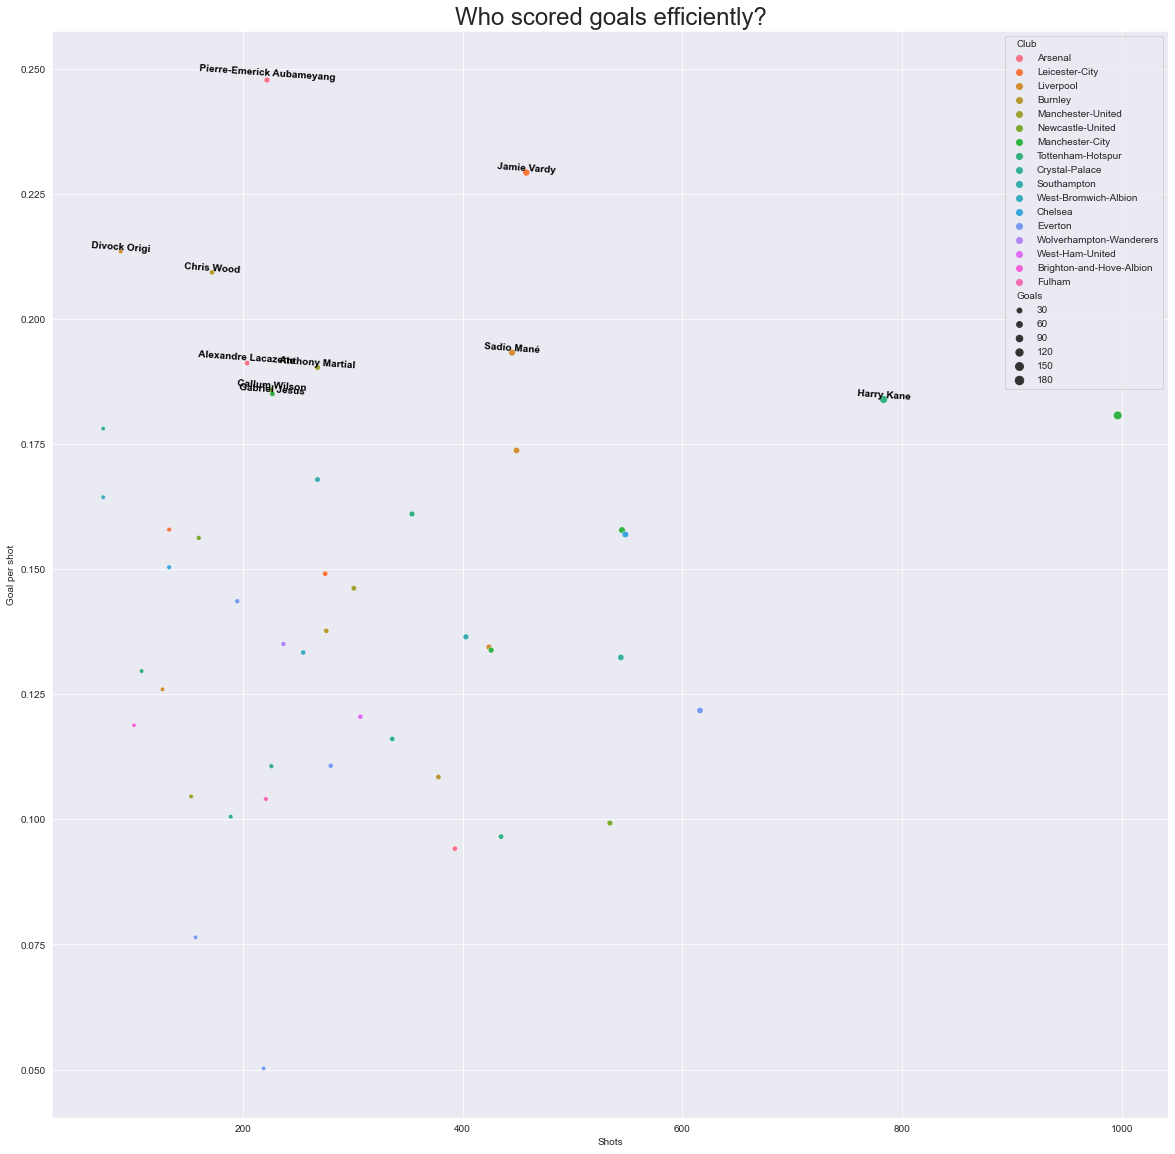

In [30]:
plt.figure(figsize = (20,20))

f2 = sns.scatterplot(data=scorer_per_shoot, x = 'Shots' , y = 'Goal per shot', hue = 'Club', size = 'Goals')
for line in range(0,10):
        f2.text(scorer_per_shoot['Shots'][line], scorer_per_shoot['Goal per shot'][line], scorer_per_shoot['Name'][line], horizontalalignment='center' , color='black', weight='semibold', rotation = -4)

plt.title('Who scored goals efficiently?', size = 24)
plt.show()

# Conclusion

I hope you enjoyed it.

In these days, Various statistical analyzes have been conducted. But I think number cannot explain the quality of a player. 

Because there is a limit, bias.

To improve for this, various indicators such as Expected Goals (xG) and Expected Assists (xA) are emerging.

It is quite sad that this dataset does not contain data such as xG and xA.

If you are curious about xG and xA, please check the link below.

https://www.sportskeeda.com/football/what-are-expected-goals-xg-and-expected-assists-xa-why-are-they-a-good-measure-of-player-performances
    
Thanks for reading.